In [8]:
from pylab import *
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

## 1MN + 2H2 -> 1MT 
## 1MN + 2H2 -> 5MT      
## 5MT -> 1MT
## 1MT + 2H2 -> Cis-1MD
## 5MT + 2H2 -> Trans-1MD

In [9]:
k = array([1,2.41,0,.11,0,.94,.62,0,0,.01]) #h^-1
T = 573.15 #K 
v0 = 45.5E3 #L 
CMN0 = 7 #mol/L 
CH20 = 1.05 #mol/L
CT0= CMN0 + CH20 #mol/L
p0 = 49.3 #atm
FT0=25000 # mol/h
V0 = FT0/CT0 #L/h
FMN0 = V0*CMN0 #mol/h
FH20 = CH20*V0 #mol/h
rhocat = .475 #kg/L
W0 = rhocat*v0

In [10]:
def odefun(W,u):
    FMN, F1MT, F5MT, Ft1MD, Fc1MD = u 
    FT = FMN + FH20 + F1MT + F5MT + Ft1MD + Fc1MD

    CMN = FMN/V0 #Concentration for liquid, how does change in pressure fit into this?
    C1MT = F1MT/V0
    C5MT = F5MT/V0
    Ct1MD = Ft1MD/V0
    Cc1MD = Fc1MD/V0

    rMN = -(k[0]+k[1])*CMN 
    r1MT = k[0]*CMN + k[3]*C5MT - (k[2] + k[3] + k[5]) * C1MT	 
    r5MT = k[1]*CMN + k[3]*C1MT-(k[3]+k[6]+k[7])*C5MT
    rc1MD = k[5] * C1MT + k[7]*C5MT + k[8] * Ct1MD - k[9] * Cc1MD
    rt1MD = k[4]*C1MT + k[6]*C5MT + k[9]*Ct1MD - k[8]*Cc1MD

    dFMNdW = rMN/rhocat
    dF1MTdW = r1MT/rhocat
    dF5MTdW = r5MT/rhocat
    dFc1MDdW = rc1MD/rhocat
    dFt1MDdW = rt1MD/rhocat

    return [dFMNdW,dF1MTdW,dF5MTdW,dFc1MDdW,dFt1MDdW]

In [18]:
Wrange = [0, W0]
u0 = array([FMN0, 0, 0, 0, 0])
W = linspace(*Wrange, 100)
result = solve_ivp(odefun, Wrange, u0, t_eval = W)

FMN, F1MT, F5MT, Fc1MD, Ft1MD = result.y

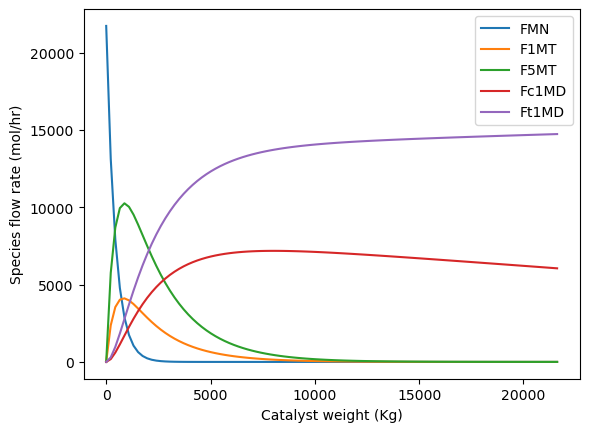

In [19]:
plot(W, FMN, W, F1MT, W, F5MT, W, Fc1MD, W, Ft1MD)
legend(['FMN', 'F1MT', 'F5MT', 'Fc1MD', 'Ft1MD'])
xlabel('Catalyst weight (Kg)')
ylabel('Species flow rate (mol/hr)')
show()